# LASSO 回归
### LASSO Regression
###### 对于线性回归：
目标函数：$J(θ)=MSE(y,\hat y;θ)$ 
加入模型正则化：

$J(θ)=J(θ)=MSE(y,\hat y;θ)+α\sum_{i=1}^{n}|θ_{i}|$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

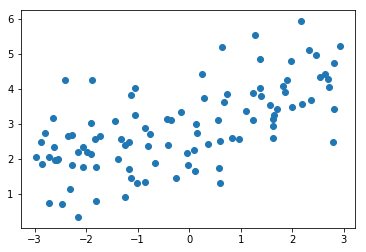

In [2]:
np.random.seed(42)
x = np.random.uniform(-3.0,3.0,size=100)
X = x.reshape(-1,1)
y = 0.5*x + 3 + np.random.normal(0,1,size=100)
plt.scatter(x,y)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split#数据集分割
np.random.seed(666)
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [4]:
from sklearn.linear_model import Lasso#导入岭回归
from sklearn.pipeline import Pipeline#管道
from sklearn.preprocessing import PolynomialFeatures#构造多项式
from sklearn.preprocessing import StandardScaler#归一化

def LassoRegression(degree,alpha):
    return Pipeline([
        ("Poly",PolynomialFeatures(degree = degree)),#构造多项式
        ("std_scaler",StandardScaler()),#归一化
        ("lin_reg",Lasso(alpha=alpha))#岭回归
    ])

In [5]:
#可视化函数，传入的是fit出来的模型
def plot_model(model):
    #可视化
    X_plot = np.linspace(-3,3,100).reshape(100,1)
    y_plot = model.predict(X_plot)
    plt.scatter(x,y)
    plt.plot(X_plot[:,0],y_plot,color="r")
    plt.axis([-3,3,0,6])
    plt.show()

1.1213911351818648


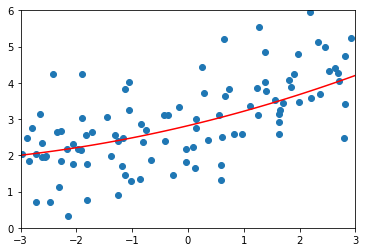

In [6]:
from sklearn.metrics import mean_squared_error#均方差
#使用lasso回归
lasso1_reg = LassoRegression(20,0.1)
lasso1_reg.fit(X_train,y_train)

lasso1_preidict = lasso1_reg.predict(X_test)
print(mean_squared_error(y_test,lasso1_preidict))

plot_model(lasso1_reg)

1.8408939659515595


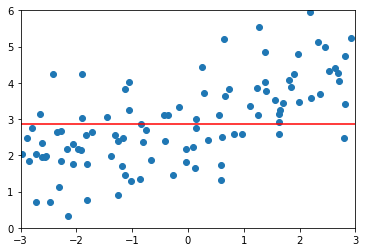

In [7]:
from sklearn.metrics import mean_squared_error#均方差
#使用lasso回归
lasso2_reg = LassoRegression(20,1)
lasso2_reg.fit(X_train,y_train)

lasso2_preidict = lasso2_reg.predict(X_test)
print(mean_squared_error(y_test,lasso2_preidict))

plot_model(lasso2_reg)

### Lasso 和 Ridge
### Lasso：
$J(θ)=MSE(y,\hat y;θ)+α\sum_{i=1}^{n}|θ_{i}|$
更倾向于是直线，当我们使用lasso时，很多θ前面的系数为0
### Ridge：
$J(θ)=MSE(y,\hat y;θ)+\frac1 2 α\sum_{i=1}^{n}(θ_{i})^2$
更倾向于是直线，当我们使用ridge时，很多θ前面的系数为很小但是还存在
### 比较
    当α=100时，岭回归甚至还是一个曲线
    而当α=0.1时，LASSO回归已经快是一个直线了
#### 原因很简单：
    Ridge的α项的▽是$θ_{i}$的向量,即便α为无穷，θ也是有值的
    LASSO的α项的▽是一个关于θ的sign函数,值为0，1，-1.在回归时，某些特诊项会变为0 

### 统计学非常诡异的两个东西：
 $\sum_{i=1}^{n}|θ_{i}|$
，MAE
，曼哈顿距离

 $\frac1 2 α\sum_{i=1}^{n}(θ_{i})^2$
，MSE
，欧拉距离
#### `根方和绝对值`

    对于曼哈顿距离和欧拉距离，我们在KNN时对两个距离得到了明可夫斯基距离回忆一下:
```
距离
# 曼哈顿距离(在每个维度的距离):`(np.sum(A - B)**1)**(1/1)`
# 欧拉距离(直接距离):`(np.sum((A - B)**2))**(1/2)`
# 推导==>明可夫斯基距离:`(np.sum((A - B)**p))**(1/p)`
## 由此得到新的超参数：p

# 向量空间余弦相似度Cosine Similarity
# 调整余弦相似度Adjusted Cosine Similarity
# 皮尔森相关系数Pearson Correlation Coefficient
# Jaccard相似系数Jaccard Coefficient
## 在sklearn.neighbors.KNeighborsClassifier还有一个超参数：metric.是一个string,由class sklearn.neighbors.DistanceMetric定义
```

我们通过明可夫斯基距离，可以得到Lp范数：
## Lp范数：
$||X||_{P} = (\sum_{i=1}^n|X_{i}|^p)^{\frac{1}{p}}$

自然的，对于岭回归和LASSO回归,分别是L2正则(范数)，L1正则
这就是所谓的正则回归，过拟合的优化方法之一

### L0正则
正则项：min{number-of-non-zero-θ}
{限制θ项的数量}
然而这是NP难问题，解开了我之前的疑惑(为什么不直接筛选某些特征，却要使用正则)


###  弹性网 Elastic Net
同时使用多种正则
例如：
$J(θ)=J(θ)=MSE(y,\hat y;θ)+rα\sum_{i=1}^{n}|θ_{i}|+\frac{1-r}{2} α\sum_{i=1}^{n}(θ_{i})^2$

引入了新的超参数r

### 总结：
    1.当特征数较多时，使用弹性网回归，岭回归很吃cpu或者gpu，LASSO回归可能会把某些特征忽略掉
    2.LASSO趋向于使的一部分的θ值等于0，意味着LASSO认为这部分θ对应的特征不重要，可以用于特征选择